## Preparing Data For LSTM Model

In [165]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [166]:

data_train = pd.read_csv('./data/BTC_hour_train.csv')

data_train = data_train.drop(columns=[data_train.columns[0], 'Time'])

data_train.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,546032.0,13581.853333,79055.774840,13577.224578,-0.631845,-1.084205
1,1375295.0,11256.200000,312627.561330,11228.619219,-2325.653333,-3.104354
2,1483002.0,11082.995000,331822.898074,11109.805837,-173.205000,-2.371885
3,1057999.0,11119.696667,204609.312037,11132.567299,36.701667,-1.849318
4,716100.0,11520.748333,125430.954800,11519.809543,401.051667,-1.324697


In [167]:
data_test = pd.read_csv('./data/BTC_hour_test.csv')

data_test = data_test.drop(columns=[data_test.columns[0], 'Time'])

data_test.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,5245264.0,36853.776250,254899.781852,36785.026600,-2334.466607,0.283444
1,4035430.0,35884.194286,174589.020944,35920.637885,-969.581964,-0.191312
2,3698231.0,35924.745714,162424.239185,35892.636068,40.551429,-0.293085
3,3329228.0,36767.647143,143617.525589,36759.579332,842.901429,-0.052462
4,3697336.0,35678.465000,161577.522564,35807.521852,-1089.182143,-0.758468


In [168]:
window_size = 4

In [169]:
past_window = data_train.tail(window_size)

data_test = past_window.append(data_test, ignore_index=True)

In [170]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

In [171]:
X_train = []
Y_train = []

for i in range(window_size, data_train.shape[0]):
    X_train.append(data_train[i-window_size:i])
    Y_train.append(data_train[i, 0])


In [172]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [173]:
X_train.shape, Y_train.shape

((986, 60, 6), (986,))

In [174]:
print(X_train)
print(Y_train)

[[[0.06237578 0.40358449 0.06640929 0.40366794 0.61162052 0.41911124]
  [0.19514287 0.31309523 0.28685708 0.31223779 0.14106245 0.34172724]
  [0.21238704 0.30635597 0.30497386 0.30761243 0.57669366 0.36978524]
  ...
  [0.11116158 0.19719795 0.19434148 0.1968641  0.62934002 0.39866559]
  [0.0666907  0.19656126 0.13854492 0.19623907 0.60843664 0.40755501]
  [0.06018638 0.17991955 0.11959942 0.18009384 0.5251854  0.40054364]]

 [[0.19514287 0.31309523 0.28685708 0.31223779 0.14106245 0.34172724]
  [0.21238704 0.30635597 0.30497386 0.30761243 0.57669366 0.36978524]
  [0.14434299 0.307784   0.18490819 0.30849853 0.6191764  0.38980275]
  ...
  [0.0666907  0.19656126 0.13854492 0.19623907 0.60843664 0.40755501]
  [0.06018638 0.17991955 0.11959942 0.18009384 0.5251854  0.40054364]
  [0.11717407 0.19690782 0.21407173 0.1959149  0.700114   0.42271016]]

 [[0.21238704 0.30635597 0.30497386 0.30761243 0.57669366 0.36978524]
  [0.14434299 0.307784   0.18490819 0.30849853 0.6191764  0.38980275]
  [0

## Training LSTM Model

In [175]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [176]:
regressor = Sequential()

regressor.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60, activation='relu', return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, activation='relu', return_sequences=True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=120, activation='relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [177]:
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 50)            11400     
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_17 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_18 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_18 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_19 (LSTM)              (None, 120)              

In [178]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [179]:
regressor.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
31/31 [==============================] - 7s 83ms/step - loss: 0.0144
Epoch 2/10
31/31 [==============================] - 3s 95ms/step - loss: 0.0099
Epoch 3/10
31/31 [==============================] - 3s 90ms/step - loss: 0.0099
Epoch 4/10
31/31 [==============================] - 3s 104ms/step - loss: 0.0091
Epoch 5/10
31/31 [==============================] - 4s 120ms/step - loss: 0.0091
Epoch 6/10
31/31 [==============================] - 3s 111ms/step - loss: 0.0085
Epoch 7/10
31/31 [==============================] - 4s 115ms/step - loss: 0.0087
Epoch 8/10
31/31 [==============================] - 4s 118ms/step - loss: 0.0079
Epoch 9/10
31/31 [==============================] - 4s 144ms/step - loss: 0.0079
Epoch 10/10
31/31 [==============================] - 4s 128ms/step - loss: 0.0081


## Preparing Test Set For LSTM Prediction

In [180]:
X_test = []
Y_test = []

for i in range(window_size, data_test.shape[0]):
    X_test.append(data_test[i-window_size:i])
    Y_test.append(data_test[i, 0])

In [181]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [182]:
X_test.shape, Y_test.shape

((221, 60, 6), (221,))

## Predicting Outputs For Test Set

In [183]:
Y_pred = regressor.predict(X_test)

In [184]:
Y_test

array([0.27300197, 0.19178015, 0.1691424 , 0.1443695 , 0.16908232,
       0.21536564, 0.33325179, 0.29221685, 0.13819271, 0.11108017,
       0.18918513, 0.18525768, 0.22128813, 0.19078568, 0.49975506,
       0.20567173, 0.39258206, 0.14765877, 0.15394627, 0.21229839,
       0.15796267, 0.21343263, 0.1784233 , 0.33195407, 0.30671821,
       0.2872554 , 0.25075374, 0.20992598, 0.17403115, 0.17364284,
       0.22882742, 0.21562887, 0.22303289, 0.14043279, 0.20790046,
       0.24447651, 0.16486216, 0.41754609, 0.55170958, 0.2666711 ,
       0.23400491, 0.29251372, 0.16888696, 0.50542458, 0.16929863,
       0.19677544, 0.21230665, 0.18049454, 0.10749115, 0.13818217,
       0.17108454, 0.19407314, 0.24076947, 0.23159175, 0.23292377,
       0.25341523, 0.15864455, 0.30435917, 0.25318415, 0.21831439,
       0.1898166 , 0.16831457, 0.1427766 , 0.15381213, 0.20077016,
       0.18478499, 0.27099773, 0.24846914, 0.17656199, 0.12605704,
       0.11545561, 0.17617315, 0.13927371, 0.41390558, 0.13534

In [185]:
Y_pred

array([[0.10145751],
       [0.10831629],
       [0.11555132],
       [0.12304366],
       [0.13056947],
       [0.13789235],
       [0.1449249 ],
       [0.15177652],
       [0.15856813],
       [0.16480868],
       [0.1699708 ],
       [0.1739499 ],
       [0.1768314 ],
       [0.17878632],
       [0.18007138],
       [0.18171977],
       [0.18377228],
       [0.18640532],
       [0.18928947],
       [0.19215328],
       [0.19486143],
       [0.19727598],
       [0.19948865],
       [0.20150977],
       [0.20416613],
       [0.20781475],
       [0.21241526],
       [0.21791424],
       [0.2239594 ],
       [0.23008405],
       [0.23601253],
       [0.24160331],
       [0.24691014],
       [0.2521365 ],
       [0.25710595],
       [0.26210064],
       [0.26728186],
       [0.27264827],
       [0.27850586],
       [0.2850851 ],
       [0.29194787],
       [0.29827783],
       [0.30365127],
       [0.3075151 ],
       [0.3106561 ],
       [0.3128642 ],
       [0.3141791 ],
       [0.314

## Descaling Outputs

In [186]:
scale_factor = 1/scaler.scale_[4]


In [187]:
scale_factor

15254.227857142863

In [188]:
Y_pred = Y_pred * scale_factor
Y_test = Y_test * scale_factor

In [189]:
Y_pred.shape, Y_test.shape

((221, 1), (221,))

In [190]:
Y_test

array([ 4164.43424866,  2925.45811529,  2580.13676277,  2202.24532466,
        2579.22020427,  3285.23651404,  5083.49869384,  4457.54248916,
        2108.02311059,  1694.4422157 ,  2885.87302885,  2825.96287359,
        3375.57948384,  2910.288304  ,  7623.37754455,  3137.36336881,
        5988.53620962,  2252.42050212,  2348.33143682,  3238.44799464,
        2409.5985083 ,  3255.74995654,  2721.70972039,  5063.70307836,
        4678.74953138,  4381.85933496,  3825.05465305,  3202.25878306,
        2654.71082999,  2648.78750666,  3490.58555803,  3289.25196196,
        3402.1944994 ,  2142.19384529,  3171.36103269,  3729.30040377,
        2514.84502659,  6369.34322546,  8415.90366382,  4067.8617533 ,
        3569.56422649,  4462.07100503,  2576.24010903,  7709.86175186,
        2582.51981488,  3001.6574097 ,  3238.57395742,  2753.30487449,
        1639.6944866 ,  2107.86232882,  2609.7625962 ,  2960.4358311 ,
        3672.75232847,  3532.75339367,  3553.07231797,  3865.65358632,
      

In [191]:
Y_pred

array([[1547.6559],
       [1652.2812],
       [1762.6461],
       [1876.9359],
       [1991.7365],
       [2103.4414],
       [2210.7173],
       [2315.2336],
       [2418.8342],
       [2514.029 ],
       [2592.7732],
       [2653.4714],
       [2697.4263],
       [2727.2473],
       [2746.8499],
       [2771.9946],
       [2803.3042],
       [2843.469 ],
       [2887.4646],
       [2931.1497],
       [2972.4604],
       [3009.2927],
       [3043.0454],
       [3073.876 ],
       [3114.3965],
       [3170.0535],
       [3240.2307],
       [3324.1133],
       [3416.3276],
       [3509.7544],
       [3600.189 ],
       [3685.472 ],
       [3766.4233],
       [3846.1475],
       [3921.9526],
       [3998.1428],
       [4077.1782],
       [4159.039 ],
       [4248.3916],
       [4348.753 ],
       [4453.4395],
       [4549.998 ],
       [4631.966 ],
       [4690.906 ],
       [4738.819 ],
       [4772.502 ],
       [4792.5596],
       [4798.289 ],
       [4790.7476],
       [4768.3486],


In [192]:
og_data_test = pd.read_csv('./data/BTC_hour_test.csv')

og_data_test = og_data_test.drop(columns=[og_data_test.columns[0], 'Time'])

close_price = og_data_test['Close'] 



In [193]:
pred_list = []
price_list = []

count = 0
for each in close_price:

    prediction = each + Y_pred [count]
    price = each + Y_test [count]
    
    pred_list.append(prediction)
    price_list.append(price)
    
    count = count + 1
    

In [194]:
pred_list

[array([38401.434], dtype=float32),
 array([37536.477], dtype=float32),
 array([37687.39], dtype=float32),
 array([38644.586], dtype=float32),
 array([37670.203], dtype=float32),
 array([37658.625], dtype=float32),
 array([32861.816], dtype=float32),
 array([35196.883], dtype=float32),
 array([34419.363], dtype=float32),
 array([34756.203], dtype=float32),
 array([34589.91], dtype=float32),
 array([35214.047], dtype=float32),
 array([33214.203], dtype=float32),
 array([36140.11], dtype=float32),
 array([37078.582], dtype=float32),
 array([36984.29], dtype=float32),
 array([36262.355], dtype=float32),
 array([38352.492], dtype=float32),
 array([40613.242], dtype=float32),
 array([39983.074], dtype=float32),
 array([41328.5], dtype=float32),
 array([41949.707], dtype=float32),
 array([41901.746], dtype=float32),
 array([49704.184], dtype=float32),
 array([49667.78], dtype=float32),
 array([48049.043], dtype=float32),
 array([51342.8], dtype=float32),
 array([50789.855], dtype=float32),
 

In [195]:
price_list

[41018.21049866122,
 38809.65240100155,
 38504.882477058854,
 38969.89246751284,
 38257.685204270594,
 38840.41937117937,
 35734.596193839694,
 37339.19106059013,
 34108.55311059392,
 33936.61596570134,
 34883.01177885438,
 35386.53787359464,
 33892.35519812964,
 36323.15330400433,
 41955.10754455296,
 37349.65765452713,
 39447.586209622226,
 37761.443359264755,
 40074.10857967846,
 40290.373708920735,
 40765.637079728476,
 42196.16370653504,
 41580.40972039048,
 51694.01057836012,
 51232.13810280691,
 49260.84790638489,
 51927.623224482675,
 50668.0002116277,
 49874.32082998591,
 51307.00036380059,
 51384.56127231339,
 52556.880533385185,
 55631.074499400005,
 53765.81527386307,
 59173.32531840148,
 59641.134689488965,
 60009.54216944219,
 60479.36465402815,
 57386.58652096185,
 53848.114610442484,
 50524.01994077696,
 50795.17336045409,
 48530.077251884824,
 57332.907466145974,
 50939.32731487977,
 53194.46702158523,
 51568.69233415221,
 51666.75201734881,
 50628.17448659952,
 52991.

## Visualization & Evaluation

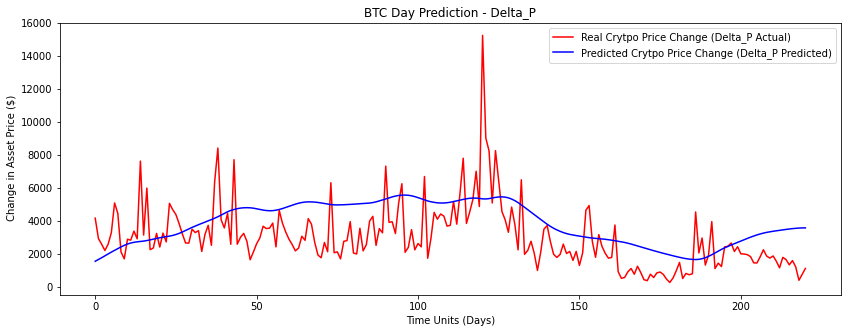

In [196]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Crytpo Price Change (Delta_P Actual)')
plt.plot(Y_pred, color = 'blue', label = 'Predicted Crytpo Price Change (Delta_P Predicted)')
plt.title('BTC Day Prediction - Delta_P')
plt.xlabel('Time Units (Days)')
plt.ylabel(' Change in Asset Price ($)')
plt.legend()
plt.show()

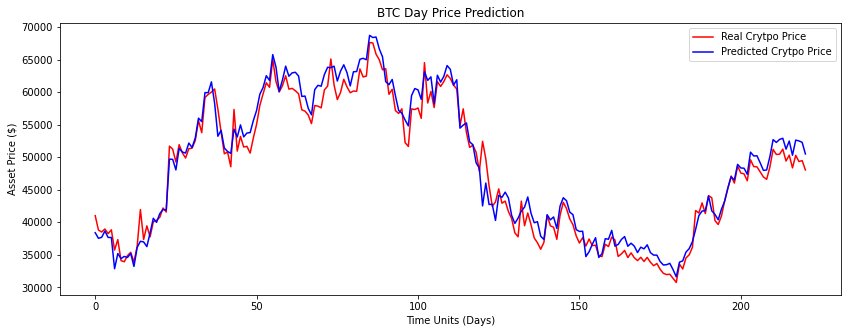

In [197]:
plt.figure(figsize=(14,5))
plt.plot(price_list, color = 'red', label = 'Real Crytpo Price')
plt.plot(pred_list, color = 'blue', label = 'Predicted Crytpo Price')
plt.title('BTC Day Price Prediction')
plt.xlabel('Time Units (Days)')
plt.ylabel('Asset Price ($)')
plt.legend()
plt.show()

In [198]:
diff_sq_sum = 0
for i in range(0, len(price_list)):
    diff = price_list[i] - pred_list[i]
    diff_sq = diff * diff
    diff_sq_sum = diff_sq_sum + diff_sq
    
RMSE = math.sqrt(diff_sq_sum/len(price_list))
    
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 1902.2925642497792


In [199]:
dir_match_count = 0
for i in range(1, len(price_list)):
    
    price_diff = price_list [i] - price_list[i - 1]
    pred_diff = pred_list[i] - pred_list[i - 1]
    
    if np.sign(price_diff) == np.sign(pred_diff):
        dir_match_count = dir_match_count + 1

correct_dir_perc = dir_match_count/(len(price_list) - 1) * 100
        
print("Correct Direction Prediction Accuracy: {:.3f} %".format(correct_dir_perc))

Correct Direction Prediction Accuracy: 77.727 %
